<img src="Untitled.png">

#  Data Science & Business Analytics Task 1

## Prediction using Supervised ML (Level - Beginner) by Jay Joshi


### Introduction
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving 2 variables. These 2 variables are Hours and Scores.


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

__IMPORT THE LIBRARIES__

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use("ggplot")
print("Imported Successful")

Imported Successful


__IMPORT THE DATASETS__

In [35]:
url = "http://bit.ly/w-data "
data_df = pd.read_csv(url)
print("Data Import Successfully")
print("Shape of data", data_df.shape)

Data Import Successfully
Shape of data (25, 2)


In [36]:
data_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [37]:
data_df.isnull().sum(axis=0)

Hours     0
Scores    0
dtype: int64

In [38]:
data_df.duplicated().sum()

0

In [39]:
data_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


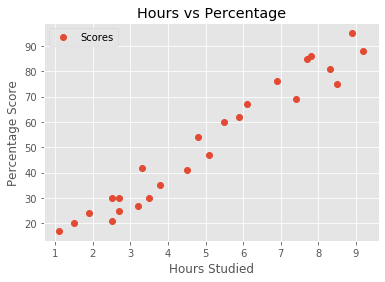

In [40]:
data_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [41]:
X = data_df.iloc[:, :-1].values  
y = data_df.iloc[:, 1].values  

Now the next step is to split this data into training and test sets. 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0 )

In [43]:
X_train[:5]

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1]])

In [44]:
X_test[:5]

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [45]:
print(X_train.shape, X_test.shape, sep='\n')

(20, 1)
(5, 1)


In [46]:
y_train[:5]

array([35, 24, 86, 76, 17], dtype=int64)

In [47]:
y_test[:5]

array([20, 27, 69, 30, 62], dtype=int64)

### **Let's train the algorithm**
We have split our data into training & testing sets, and now is finally the time to train our algorithm.

In [48]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [49]:
print("The coeficient of the given moel :",lm.coef_)

The coeficient of the given moel : [9.91065648]


In [50]:
print("The intercepting point of given model :",lm.intercept_)

The intercepting point of given model : 2.018160041434683


### Plotting

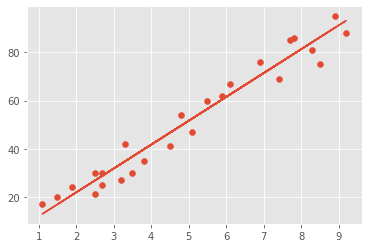

In [19]:
# Plotting the regression line
reg_line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
y_pred = lm.predict(X_test)

In [21]:
y_pred[:5]

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


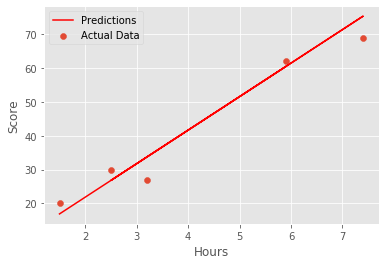

In [23]:
plt.scatter(X_test, y_test, label='Actual Data')
plt.xlabel("Hours")
plt.ylabel("Score")
plt.plot(X_test, y_pred, 'r', label='Predictions')
plt.legend()
plt.show()

In [24]:
error = (y_test - y_pred)
error[:5]

array([ 3.11585524, -6.73226078, -6.357018  ,  3.20519876,  1.50896672])

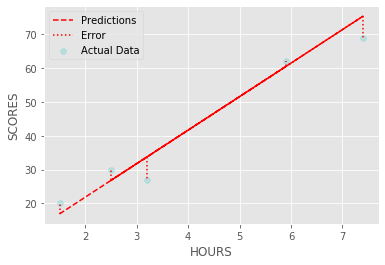

In [25]:
plt.scatter(X_test, y_test, label='Actual Data', color='c', alpha=0.2)
plt.xlabel('HOURS')
plt.ylabel("SCORES")
plt.plot(X_test, y_pred, 'r--', label='Predictions')
for i in range(X_test.shape[0]):
    x1, y1 = X_test[i], y_pred[i]
    x2, y2 = X_test[i], y_test[i]
    plt.plot([x1, x2], [y1, y2], color='r', ls=':', markerfacecolor='green')
plt.plot([], [], color='r', ls=':', label='Error')
plt.legend()
plt.show()

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [51]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Square Error:",
      metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.5987693072174


### Conclusion

In [52]:
# You can also test with your own data
hours = 9.25
pred_score = lm.coef_*(hours)+lm.intercept_
print("No of Study hours ", hours)
print("Predicted Score for the given study hour :", pred_score)

No of Study hours  9.25
Predicted Score for the given study hour : [93.69173249]


__The percentage of marks scored by student When he/she studied 9.25 hrs is 93.69%__